### Assignment: Final Project
### Name: Samantha Rodriguez
### Date: 11-11-2024

We are analyzing a dataset on sleep, health, and lifestyle from kaggle.

Statistical Question: How does stress level impact the duration and quality of sleep?

Hypothesis: High Stress levels negatively impact Sleep Duration and Quality of Sleep.

In [23]:
# Set up libraries and environment to plot and answer statistical questions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, pearsonr, ttest_ind
import statsmodels.api as sm

In [24]:
# Check working directory
import os
os.getcwd()

'C:\\Users\\samys\\Documents\\Bellevue BRUIN\\FALL 2024\\DSC 530\\Final Project'

In [25]:
# Read data set and display first few rows
dataset = pd.read_csv('C:\\Users\\samys\\Documents\\Bellevue BRUIN\\FALL 2024\\DSC 530\\Final Project\\Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Five Variables 
 1. Sleep Duration: Hours of sleep, describing a continuous variable
 2. Quality of Sleep: Rating of sleep from a scale of 1-10, ordinal
 3. Physical Activity Level: An indicator of activity frequency, ordinal
 4. Stress Level: Scale of stress levels, ordinal
 5. Age: Measured in years, continuous  

In [44]:
# Select five variables and display descriptive statistics, showing the characteristics of each variable
variables = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Age']
descriptive = data[variables].describe()
print(descriptive)

       Sleep Duration  Quality of Sleep  Physical Activity Level  \
count      374.000000        374.000000               374.000000   
mean         7.132086          7.312834                59.171123   
std          0.795657          1.196956                20.830804   
min          5.800000          4.000000                30.000000   
25%          6.400000          6.000000                45.000000   
50%          7.200000          7.000000                60.000000   
75%          7.800000          8.000000                75.000000   
max          8.500000          9.000000                90.000000   

       Stress Level         Age  
count    374.000000  374.000000  
mean       5.385027   42.184492  
std        1.774526    8.673133  
min        3.000000   27.000000  
25%        4.000000   35.250000  
50%        5.000000   43.000000  
75%        7.000000   50.000000  
max        8.000000   59.000000  


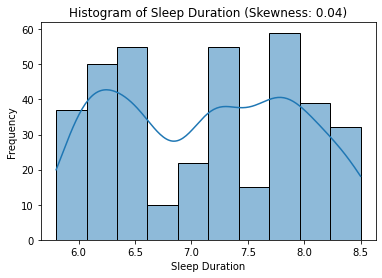

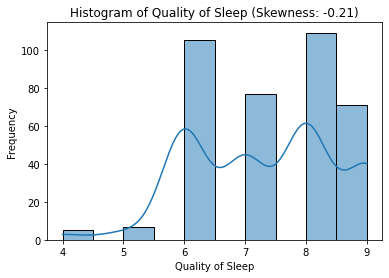

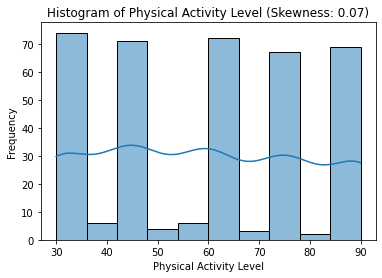

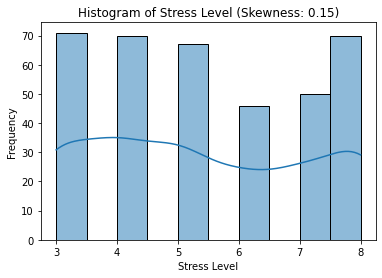

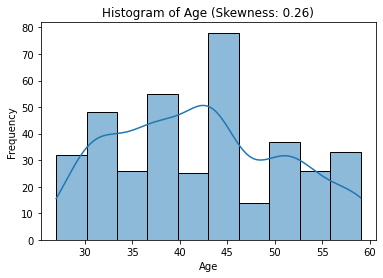

In [45]:
# Plot histograms with skewness values displayed in the title for each specified variable
for var in variables:
    
    # Plot histograms
    plt.figure()
    
    # Using KDE to 
    sns.histplot(data[var], kde=True)
    skewness_value = data[var].skew()
    plt.title(f'Histogram of {var} (Skewness: {skewness_value:.2f})')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


In [46]:
# Using Interquartile Range, identify any outliers in each variable
outliers = {}
for var in variables:
    
    # Set up first (25th percentile) and third quartile (75th percentile)
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]
    
    # Print lower and upper bound as well any outlier found in each variable
    print(f"{var} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers seen in {var}:\n", outliers[var])


Sleep Duration - Lower Bound: 4.300000000000001, Upper Bound: 9.899999999999999
Outliers seen in Sleep Duration:
 Series([], Name: Sleep Duration, dtype: float64)
Quality of Sleep - Lower Bound: 3.0, Upper Bound: 11.0
Outliers seen in Quality of Sleep:
 Series([], Name: Quality of Sleep, dtype: int64)
Physical Activity Level - Lower Bound: 0.0, Upper Bound: 120.0
Outliers seen in Physical Activity Level:
 Series([], Name: Physical Activity Level, dtype: int64)
Stress Level - Lower Bound: -0.5, Upper Bound: 11.5
Outliers seen in Stress Level:
 Series([], Name: Stress Level, dtype: int64)
Age - Lower Bound: 13.125, Upper Bound: 72.125
Outliers seen in Age:
 Series([], Name: Age, dtype: int64)


This dataset is pretty balanced, there were no results yielded for any of the variables and they fall within expected ranges.

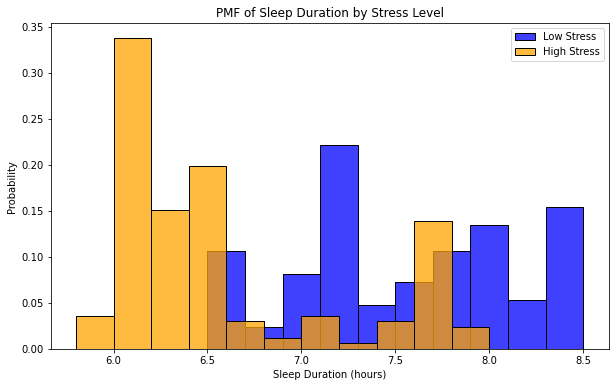

In [63]:
# Create a PMF looking at two scenarios

# Calculate median stress levels
median_stress = data['Stress Level'].median()

# Find value that contain stress levels below and above the median stress
low_stress_duration = data[data['Stress Level'] <= median_stress]['Sleep Duration']
high_stress_duration = data[data['Stress Level'] > median_stress]['Sleep Duration']

# Plot the PMF for sleep duration based on stress level threshold
plt.figure(figsize=(10, 6))
sns.histplot(low_stress_duration,
             stat='probability',
             label='Low Stress',
             kde=False, binwidth=0.2, color='blue')
sns.histplot(high_stress_duration,
             stat='probability',
             label='High Stress',
             kde=False, binwidth=0.2, color='orange')
plt.title('PMF of Sleep Duration by Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Probability')
plt.legend()
plt.show()



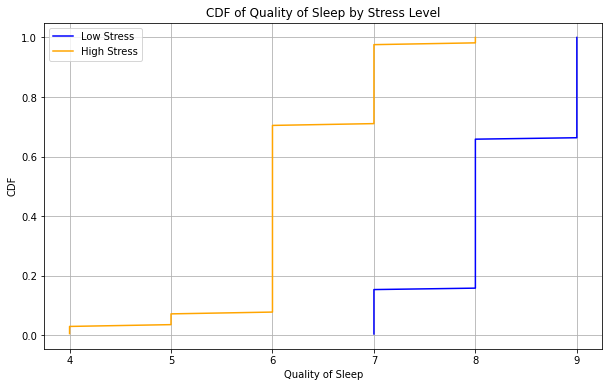

In [64]:
# Define stress groups for Quality of Sleep using the median set up thresholds
low_stress_quality = data[data['Stress Level'] <= median_stress]['Quality of Sleep']
high_stress_quality = data[data['Stress Level'] > median_stress]['Quality of Sleep']

# Sort Quality of Sleep values for low stress and high stress in ascending order
low_stress_quality_sorted = np.sort(low_stress_quality_sleep)
high_stress_quality_sorted = np.sort(high_stress_quality_sleep)

# Calculate the CDF for each group creating a cumulative count
low_stress_quality_cdf = np.arange(1, len(low_stress_quality_sorted) + 1) / len(low_stress_quality_sorted)
high_stress_quality_cdf = np.arange(1, len(high_stress_quality_sorted) + 1) / len(high_stress_quality_sorted)

# Plot the CDF for Quality of Sleep by stress level
plt.figure(figsize=(10, 6))

# Use the same color scheme that was used for the PMF
plt.plot(low_stress_quality_sorted, low_stress_quality_cdf, label='Low Stress', color='blue')
plt.plot(high_stress_quality_sorted, high_stress_quality_cdf, label='High Stress', color='orange')
plt.title('CDF of Quality of Sleep by Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()



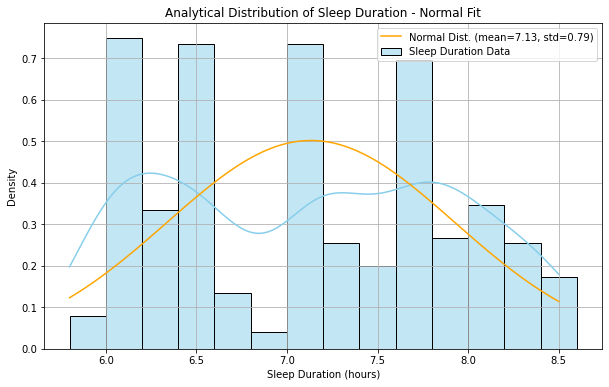

In [54]:
# We will plot a normal distribution fit since the nature of the data isn't overtly skewed
# This will further test the statistical question

# Fit a normal distribution to the "Sleep Duration" data
# Store mean and standard deviation
mean_sleep, std_sleep = norm.fit(data['Sleep Duration'])

# Generate x values that represent continuous range of sleep duration
x_values = np.linspace(data['Sleep Duration'].min(), data['Sleep Duration'].max(), 100)

# Plot the histogram of Sleep Duration with a KDE (smooth distribution) for comparison
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Duration'],
             kde=True, stat="density",
             label="Sleep Duration Data",
             color="skyblue", binwidth=0.2)

# Calculate the PDF at each data point
plt.plot(x_values, norm.pdf(x_values, mean_sleep, std_sleep),
         # Create a label that will show the mean and standard deviation
         label=f'Normal Dist. (mean={mean_sleep:.2f},
         std={std_sleep:.2f})',color="orange")

# Titles and labels, add grid and plot the distribution
plt.title("Analytical Distribution of Sleep Duration - Normal Fit")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



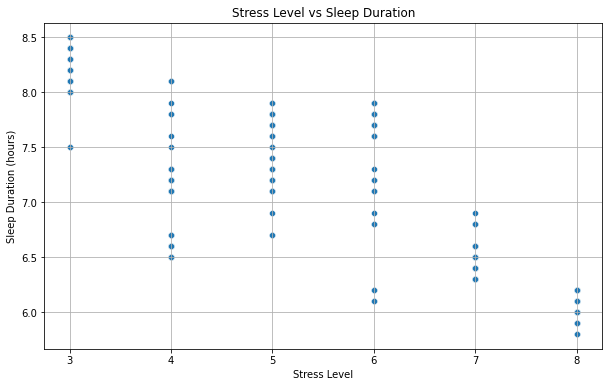

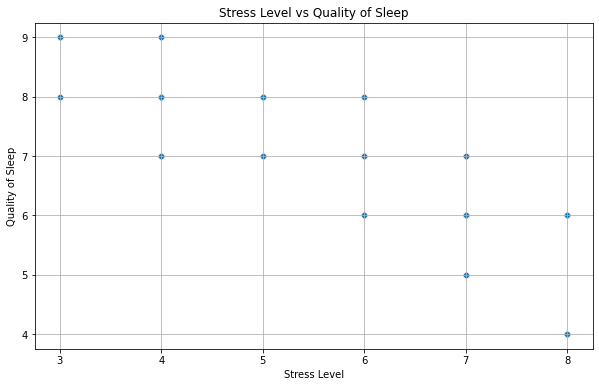

In [57]:
# We will create two scatterplots measuring sleep duration and quality of sleep
# Scatter plot, stress level vs sleep duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Sleep Duration', data=data)
plt.title('Stress Level vs Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.grid(True)
plt.show()

# Scatter plot, stress Level vs quality of Sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=data)
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.grid(True)
plt.show()

In [69]:
# Calculate Pearson's correlation and covariance for both pairs of variables
# Pearson's Correlation for Stress Level vs Sleep Duration
correlation_duration, _ = pearsonr(data['Stress Level'], data['Sleep Duration'])
covariance_duration = np.cov(data['Stress Level'], data['Sleep Duration'])[0, 1]

# Pearson's Correlation for Stress Level vs Quality of Sleep
correlation_quality, _ = pearsonr(data['Stress Level'], data['Quality of Sleep'])
covariance_quality = np.cov(data['Stress Level'], data['Quality of Sleep'])[0, 1]

# Print results
results = {
    "Stress Level vs Sleep Duration": {
        "Pearson's Correlation": correlation_duration,
        "Covariance": covariance_duration
    },
    "Stress Level vs Quality of Sleep": {
        "Pearson's Correlation": correlation_quality,
        "Covariance": covariance_quality
    }
}
results

{'Stress Level vs Sleep Duration': {"Pearson's Correlation": -0.8110230278940431,
  'Covariance': -1.1450946939828832},
 'Stress Level vs Quality of Sleep': {"Pearson's Correlation": -0.8987520310040416,
  'Covariance': -1.9089762153947643}}

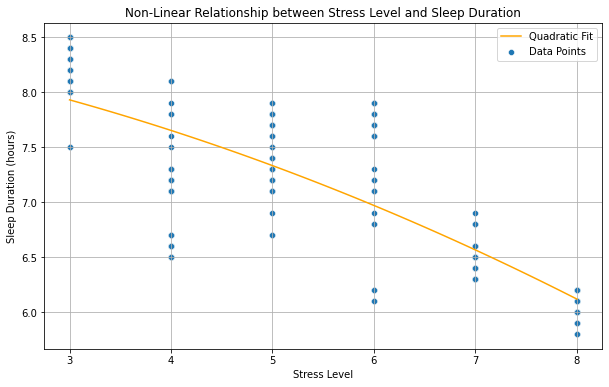

In [73]:
# We will briefly explore the possiblity of a nonlinear relationship 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Scatter plot with polynomial regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Sleep Duration', data=data, label='Data Points')

# Transform the Stress Level variable to a quadratic model
# This will allow us to fit a curve to plot non-linear patterns
poly = PolynomialFeatures(degree=2)  # Quadratic
X_poly = poly.fit_transform(data[['Stress Level']])

# Fit the model
poly_model = LinearRegression().fit(X_poly, data['Sleep Duration'])

# Generate predictions across the range of stress levels for a smooth curve
# Transform values for polynomial regression
stress_range = np.linspace(data['Stress Level'].min(), data['Stress Level'].max(), 100).reshape(-1, 1)
stress_range_poly = poly.transform(stress_range)

# Calculate predicted sleep durations
predicted_sleep_duration = poly_model.predict(stress_range_poly)

# Plot the polynomial regression line, with an orange line representing the quadratic fit
plt.plot(stress_range, predicted_sleep_duration, color='orange', label='Quadratic Fit')
plt.title("Non-Linear Relationship between Stress Level and Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Hypothesis Testing
# Median stress levels based on high and low stress groups
median_stress = data['Stress Level'].median()
low_stress_duration = data[data['Stress Level'] <= median_stress]['Sleep Duration']
high_stress_duration = data[data['Stress Level'] > median_stress]['Sleep Duration']

# T-Test for Duration of Sleep
t_stat, p_value = ttest_ind(low_stress_duration, high_stress_duration, equal_var=False)

# Display results
t_results = {
    "t-statistic": t_stat,
    "p-value": p_value
}
t_results


{'t-statistic': 15.798774004882642, 'p-value': 1.6621711483816982e-42}

In [67]:
# Hypothesis Testing
# Median stress levels based on high and low stress groups
median_stress = data['Stress Level'].median()
low_stress_quality = data[data['Stress Level'] <= median_stress]['Quality of Sleep']
high_stress_quality = data[data['Stress Level'] > median_stress]['Quality of Sleep']

# T-Test for Quality of Sleep
t_stat_quality, p_value_quality = ttest_ind(low_stress_quality, high_stress_quality, equal_var=False)

# Print results
t_results_quality = {
    "t-statistic": t_stat_quality,
    "p-value": p_value_quality
}
t_results_quality


{'t-statistic': 27.459539195332074, 'p-value': 2.60135945259496e-89}

In [74]:
# We will conduct a multiple regression analysis using the following variables
# Sleep duration will be the dependent variable
X_multi = data[['Stress Level', 'Quality of Sleep', 'Physical Activity Level']]
y_multi = data['Sleep Duration']

# A constant is added to the independent variables to include an intercept in the model
X_multi = sm.add_constant(X_multi)

# Multiple linear regression model fitting
multi_model = sm.OLS(y_multi, X_multi).fit()

# Print summary of the regression results
multi_model_summ = multi_model.summary()
multi_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          4.13e-123
Time:                        00:54:20   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.6737      0.402      9.132      0.000       2.883       4.465
Stress Level               -0.0607      0.026     -2.331      0.020      -0.112      -0.009
Quality of Sleep            0.4981      0.039     12.663      0.000       0.421       0.575
Physical Activity Level     0.0024      0.001      2.434      0.015       0.000       0.004
==============================================================================
Omnibus:                       31.756   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.774
Skew:                           0.729   Prob(JB):                     1.71e-08
Kurtosis:                       2.590   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""